In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 載入台幣匯率數據
exchange_rate_data = pd.read_csv('exchange_rate.csv')
# 載入台股指數數據
stock_index_data = pd.read_csv('stock_index.csv')

In [16]:
merged_data = pd.merge(exchange_rate_data, stock_index_data, on='Date')

In [17]:
# 計算台幣匯率和台股指數的相關性
correlation = merged_data['rate'].corr(merged_data['Close'])

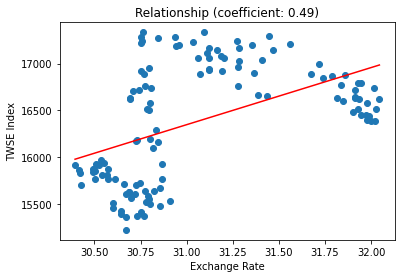

In [33]:
plt.scatter(merged_data['rate'], merged_data['Close'])
#regression line
plt.plot(np.unique(merged_data['rate']), np.poly1d(np.polyfit(merged_data['rate'], merged_data['Close'], 1))(np.unique(merged_data['rate'])), color='red')
plt.xlabel('Exchange Rate')
plt.ylabel('TWSE Index')
plt.title(f'Relationship (coefficient: {correlation:.2f})')
plt.show()

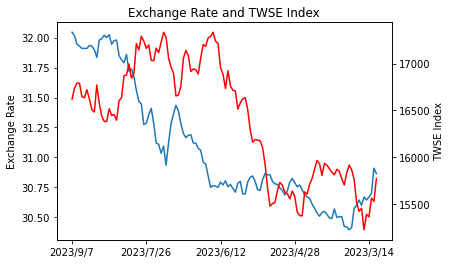

In [41]:
# 疊圖
fig, ax1 = plt.subplots()
ax1.plot(merged_data['Date'], merged_data['rate'], label='Exchange Rate')
ax1.set_ylabel('Exchange Rate')
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['Close'], color='red', label='TWSE Index')
ax2.set_ylabel('TWSE Index')
plt.title('Exchange Rate and TWSE Index')
# 設定 X 軸刻度標籤
plt.xticks(merged_data['Date'][::30])
plt.show()